In [3]:
#k-meansでirisデータをクラスタリング
#決定木を利用し、irisデータのあやめ品種がどの品種に分類されるかのモデルを構築する
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
iris = pd.read_csv('iris.csv')

In [5]:
#k-means法
from sklearn import cluster

In [6]:
X = iris[["sepal.length", "sepal.width"]]

In [8]:
#kmeansモデルの構築
kmeansCls = cluster.KMeans(n_clusters=3, random_state=71)
kmeansCls.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=71, tol=0.0001, verbose=0)

In [9]:
#クラスタリング結果
print(kmeansCls.predict(X))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [10]:
#可視化
def category2int(x):
    category = {"Setosa":0, "Versicolor":1, "Virginica":2}
    return category[x]

In [13]:
f = lambda x: category2int(x)

In [14]:
Y = iris["variety"].map(f)

In [15]:
xMin = X["sepal.length"].min()
xMax = X["sepal.length"].max()
yMin = X["sepal.width"].min()
yMax = X["sepal.width"].max()

xx, yy = np.meshgrid(np.arange(xMin, xMax, 0.01), np.arange(yMin, yMax, 0.01))

In [16]:
Z = kmeansCls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

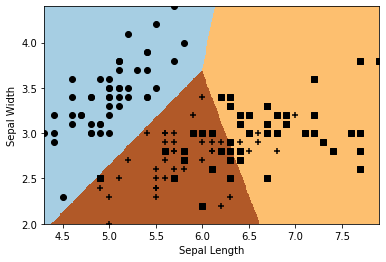

In [18]:
plt.figure()
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X["sepal.length"].iloc[Y.values==0], X["sepal.width"].iloc[Y.values==0], marker="o", c="black")
plt.scatter(X["sepal.length"].iloc[Y.values==1], X["sepal.width"].iloc[Y.values==1], marker="+", c="black")
plt.scatter(X["sepal.length"].iloc[Y.values==2], X["sepal.width"].iloc[Y.values==2], marker="s", c="black")